In [40]:
from numpy import *
from matplotlib import *
from pylab import *
from scipy import *
from numpy import*
import csv
import xlrd

rc('text',usetex = True)
rc('font', family='serif')

from scipy.optimize import curve_fit

In [369]:
Prop = xlrd.open_workbook('Gd-Y.xlsx') #Import Properties File
SpecHeat = Prop.sheet_by_name('C') # #Import Specific Heat
dTad = Prop.sheet_by_name('dT') #Import Adiabatic Temperature Change

T_exp = dTad.col_values(0) #Import experimented temperatures 
B_exp = dTad.col_values(1) #Import experimented magnetic fields

T = arange(min(T_exp),max(T_exp)+0.01,0.1)

K = len(dTad.col_values(0)) #Import data number

In [370]:
N_ml = 4 #Number of Multilayer Layers
T_l = [273,278,283,290] # Temperature of Curie of the multilayer

In [371]:
dT = zeros([N_ml,K])
C = zeros([N_ml,K])
for i in range(N_ml):
    dT[i,:] = (dTad.col_values(i+2))    #Data of Adiabatic Temperature change
    C[i,:] = (SpecHeat.col_values(i+2)) #Dara of specific heat

In [372]:
def Properties(SpecHeat,dTad,B_l_int,B_h_int,T,N_ml):
    #T_exp = dTad.col_values(0)
    #B_exp = dTad.col_values(1)

    #K = len(dTad.col_values(0))

    #dT = zeros([N_l,K])
    #C = zeros([N_l,K])
    
    #for i in range(4):
        #dT[i,:] = (dTad.col_values(i+2))
        #C[i,:] = (SpecHeat.col_values(i+2))
    

    C_l = np.zeros([N_ml,len(T)])
    C_h = np.zeros([N_ml,len(T)])
    dT_l = np.zeros([N_ml,len(T)])
    dT_h = np.zeros([N_ml,len(T)])
    

    for i in range(K):
        if B_exp[i] == B_l_int:
            for j in range(N_ml):
                C_l[j][i]=C[j,i]
                dT_l[j][i]=dT[j,i]
                
                #C_l[j].append(C[j,i])
                #dT_l[j].append(dT[j,i])
        if B_exp[i] == B_h_int and B_exp[i-1]< B_h_int:
            A = i
        if B_exp[i] == B_h_int:
            for j in range(N_ml):
                C_h[j][i-A]=C[j,i]
                dT_h[j][i-A]=dT[j,i]               
                
                #C_h[j].append(C[j,i])
                #dT_h[j].append(dT[j,i])
                
    return(C_l,C_h,dT_l,dT_h)

In [373]:
(C_l,C_h,dT_l,dT_h) = Properties(SpecHeat,dTad,0,1,T,N_ml) #Properties of low and high fields
dT_ad = np.array(dT_h)-np.array(dT_l)

In [374]:
T_dem = zeros([N_ml,len(T)])
for j in range(N_ml):
    T_dem[j] = T + dT_ad[j]

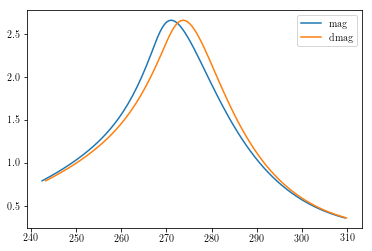

In [375]:
plt.plot(T,dT_ad[0],label = 'mag')
plt.plot(T_dem[0],dT_ad[0],label = 'dmag')
plt.legend()

In [376]:
dT_ad_d = np.zeros([N_ml,len(T)])
for i in range(N_ml):
    for j in range(len(T)):
        for k in range(len(T_dem[i])):
            if  T[j] > T_dem[i][k] and T[j] <= T_dem[i][k+1]:
                dT_ad_d[i][j] = (dT_ad[i][k] + (T[j] - T_dem[i][k])*(dT_ad[i][k+1]-dT_ad[i][k])/(T[k+1]-T[k]))


In [405]:
#Metric(Th,Tc,T_l,T_layer,L_layer)

Th = 300
Tc = 270

C_mag = []
C_dmag = []
dT_mag = []
dT_dmag = []

T_int = np.arange(Tc,Th+0.01,0.1)


T_layer = [273,289.9]
L_layer = [50,50]
N_l = len(T_layer)

A = np.int((Tc - 242.5)/0.1)



T_t = []
L = 0

for i in range(N_l):
    L = L + L_layer[i]
    T_tr = Tc + 0.001 +L/100*(Th-Tc)
    T_t.append(T_tr)

k = 0    
for i in range (len(T_int)):
    #print(T_int[i])
    if T_int[i] <=T_t[k]:
        #print(T_int[i],T_t[k])
        for j in range(len(T_l)):
            #print(T_layer[k],T_l[j])
            if T_layer[k] >= T_l[j] and T_layer[k] < T_l[j+1]:
                #print('Hello')
                #print(T_int[i],T_t[k],T_layer[k],T_l[j],T_l[j+1])
                C_mag.append(C_h[j+1][int(i+A)]-(C_h[j+1][int(i+A)]-C_h[j][int(i+A)])*(T_l[j+1]-T_layer[k])/(T_l[j+1]-T_l[j]))
                #print(T_int[i],C_h[j+1][int(i+A)],C_h[j][int(i+A)],(C_h[j+1][int(i+A)]-(C_h[j+1][int(i+A)]-C_h[j][int(i+A)])*(T_l[j+1]-T_layer[k])/(T_l[j+1]-T_l[j])))
    else:
        for j in range(len(T_l)):
            if T_layer[k+1] >= T_l[j] and T_layer[k+1] < T_l[j+1]:
                C_mag.append(C_h[j][int(i+A)]+(C_h[j+1][int(i+A)]-C_h[j][int(i+A)])*(T_layer[k+1]-T_l[j])/(T_l[j+1]-T_l[j]))
                #print(T_int[i],C_h[j+1][int(i+A)],C_h[j][int(i+A)],T_l[j+1],T_l[j],T_layer[k],(C_h[j+1][int(i+A)]-(C_h[j+1][int(i+A)]-C_h[j][int(i+A)])*(T_l[j+1]-T_layer[k])/(T_l[j+1]-T_l[j])))
        k = k + 1
        

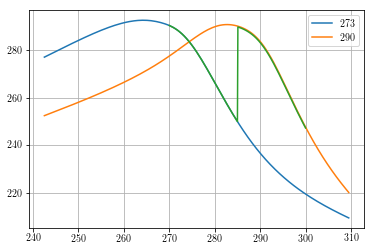

In [408]:
plt.plot(T,C_h[0],label = '273')
plt.plot(T,C_h[3],label = '290')
plt.plot(T_int,C_mag)
plt.grid()
plt.legend()

In [279]:
def Cdt(T_m,L_m,Th,Tc,T,T_dem,C_m,C_d,dT_ad):
    
    C_mag = []
    C_dmag = []
    dT_mag = []
    dT_dmag = []
    T_t = []
    T_int = []
    
    N_l = len(T_m)
    a = zeros(N_l)
    

    
    for i in range (N_l):
        for j in range(len(T_t)+1):
            if T_m[i]>T_l[j] and T_m[i]<=T_l[j+1]:
                C_mag.append(C_h[j][i]+(C_h[j+1][i]-C_h[j][i])*(T_m[i]-T_l[j])/(T_l[j+1]-T_l[j]))
                C_dmag.append(C_l[j][i]+(C_l[j+1][i]-C_l[j][i])*(T_m[i]-T_l[j])/(T_l[j+1]-T_l[j]))
                dT_mag.append(dT_ad[j][i]+(dT_ad[j+1][i]-dT_ad[j][i])*(T_m[i]-T_l[j])/(T_l[j+1]-T_l[j]))
                dT_dmag.append(dT_ad_d[j][i]+(dT_ad_d[j+1][i]-dT_ad_d[j][i])*(T_m[i]-T_l[j])/(T_l[j+1]-T_l[j]))
                T_int.append(T[i]) 
                          
    return(C_mag,C_dmag,dT_mag,dT_dmag,T_int,dT_ad_d)

In [96]:
(C_mag,C_dmag,dT_mag,dT_dmag,T_int,dT_ad_d) = Cdt([273,300],[50,50],300,270,T,T_dem,C_m,C_d,dT_ad)

IndexError: list index out of range

In [ ]:
plt.plot(T_int,dT_mag,label = 'mag')
plt.plot(T_int,dT_dmag, label = 'dmag')
plt.legend()
plt.show()